In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from sklearn import metrics  
from sklearn.metrics import confusion_matrix

# import NN layers and other componenets.
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from numpy import loadtxt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:

tf.random.set_seed(100) # to make sure the experiment is reproducible.
tf.debugging.set_log_device_placement(False)


# Using a GPU (Graphical Processing Unit) to make the code run faster.
tf.config.experimental.list_physical_devices('GPU')  

[]

In [3]:
# Create a custom function for data transformation

features = ['datetime',
            'latitude',
            'longitude',
            'absoluteAltitude',
            'magneticHeading',
            'trueHeading',
            'groundSpeed',
            'trueAirspeed',
            'pitch',
            'roll',
            'yaw',
            'angleOfAttack',
            'flightPathAngle',
            'verticalFlightPathAngle',
            'horizontalFlightPathAngle',
            'rollAcceleration',
            'pitchAcceleration',
            'yawAcceleration',
            'e1N1ng',
            'e2N1ng',
            'e1N2nf',
            'e2N2nf',
            'mainRotorRpm',
            'tailRotorRpm',
            'mainRotorTorque',
            'e1Itt',
            'e2Itt',
            'mainRotorInducedInflow',
            'flightDirectorPitch',
            'flightDirectorRoll',
            'climbOrDescentRate',
            'hasWeightOnWheels',
            'turnRate to degPerSec',
            'cyclicPositionPitch',
            'cyclicPositionRoll',
            'collectivePosition',
            'antiTorquePedalPosition',
            'throttlePosition',
            'e1Torque',
            'e2Torque'
           ]

In [4]:
def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output 

In [5]:
# reading files from 9/19 dataset
df1 = pd.read_csv('SimData_2022.09.19_16.00.36.csv.roar.csv',
                 parse_dates = {'datetime': ['date', 'time']},
                 low_memory=False)
df1 = df_transformation(df1)


df2 = pd.read_csv('SimData_2022.09.19_16.38.20.csv.roar.csv',
                 parse_dates = {'datetime': ['date', 'time']},
                 low_memory=False)
df2 = df_transformation(df2)


df3 = pd.read_csv('SimData_2022.09.19_17.51.37.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df3 = df_transformation(df3)



# reading files from 9/20 dataset
df4 = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df4 = df_transformation(df4)


df5 = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df5 = df_transformation(df5)


# reading file from 9/22 dataset
df6 = pd.read_csv('SimData_2022.09.22_17.11.56.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df6 = df_transformation(df6)


# reading file from 10/06 dataset
df7 = pd.read_csv('SimData_2022.10.06_09.47.22.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df7 = df_transformation(df7)


# reading file from 10/20 dataset
df8 = pd.read_csv('SimData_2022.10.20_17.19.15.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df8 = df_transformation(df8)


# reading files from 10/27 dataset
df9 = pd.read_csv('SimData_2022.10.27_17.55.06.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df9 = df_transformation(df9)



C:\Users\fariy\AppData\Local\Temp\ipykernel_18764\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# Quick Stops

In [6]:
#Combine files
dfqs = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9]).reset_index()
len(dfqs)

12367

In [7]:
#normalize values 
df_norm = dfqs.loc[:, dfqs.columns != 'datetime']
df_norm = (df_norm-df_norm.min())/(df_norm.max()-df_norm.min())
df_norm.insert(1, 'datetime', dfqs[['datetime']])

In [8]:
# Dataframe labeling for Quick Stops 
df_qs = df_norm
df_qs['Quick_Stop'] = 0

df_qs.loc[(df_qs['datetime'].between('2022-09-19 22:00:45' , '2022-09-19 22:01:44' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-19 22:11:55' , '2022-09-19 22:13:21' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-22 21:36:30' , '2022-09-22 21:37:10' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-22 21:39:16' , '2022-09-22 21:39:42' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-09-22 21:40:06' , '2022-09-22 21:40:36' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-06 13:51:10' , '2022-10-06 13:51:42' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-06 14:04:58' , '2022-10-06 14:05:25' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-06 14:06:00' , '2022-10-06 14:06:20' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-06 14:08:02' , '2022-10-06 14:08:26' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:23:30' , '2022-10-20 21:23:54' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:24:55' , '2022-10-20 21:25:20' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:26:20' , '2022-10-20 21:26:46' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:27:47' , '2022-10-20 21:28:05' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:29:33' , '2022-10-20 21:29:56' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:30:50' , '2022-10-20 21:31:12' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:32:20' , '2022-10-20 21:32:40' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:33:55' , '2022-10-20 21:34:18' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:35:20' , '2022-10-20 21:35:45' , inclusive='both')),['Quick_Stop']] = 1
df_qs.loc[(df_qs['datetime'].between('2022-10-20 21:36:45' , '2022-10-20 21:37:11' , inclusive='both')),['Quick_Stop']] = 1


In [9]:
#call features used in model
model_features = ['hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque',
                  'Quick_Stop'
                 ]

Create a balanced dataset & train NN

In [10]:
df_qs_train = df_qs[df_qs['Quick_Stop']==1]           # The original rows that have label 1
non_df_qs_train = df_qs[df_qs['Quick_Stop']==0]       # The original rows that have label 0

In [11]:
print(len(df_qs_train))
print(len(non_df_qs_train))

595
11772


In [12]:
sampled_non_df_qs = non_df_qs_train.sample(n = 595)    # Sample 595 data points from the quick stop data

In [13]:
print(len(df_qs_train))
print(len(sampled_non_df_qs))

595
595


In [14]:
merged = pd.concat([df_qs_train, sampled_non_df_qs])     # After class-balancing, concatenating both classes into 1 dataframe

In [15]:
print(len(merged))

1190


In [16]:
merged = merged[model_features]

merged

,hasWeightOnWheels,absoluteAltitude,magneticHeading,groundSpeed,climbOrDescentRate,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,Quick_Stop
3173,0.0,0.020858,0.488855,1.778890e-01,0.640736,0.326843,0.561531,0.270058,0.546607,0.373957,0.542983,0.451720,0.451720,1
3174,0.0,0.022793,0.488580,1.925374e-01,0.628856,0.385933,0.568142,0.268968,0.542782,0.373139,0.544180,0.453602,0.453602,1
3175,0.0,0.024614,0.488998,2.070020e-01,0.622711,0.441976,0.573673,0.276268,0.537929,0.387179,0.545072,0.455966,0.455966,1
3176,0.0,0.026540,0.492112,2.224294e-01,0.623406,0.524060,0.571846,0.277981,0.550412,0.377349,0.551281,0.461191,0.461191,1
3177,0.0,0.029100,0.494574,2.387624e-01,0.641085,0.560438,0.577045,0.280491,0.556116,0.362182,0.567373,0.490556,0.490556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,1.0,0.000035,0.585542,0.000000e+00,0.546517,0.499316,0.588737,0.543743,0.000081,0.438133,0.443598,0.297766,0.297766,0
954,0.0,0.624502,0.024077,8.751792e-01,0.659469,0.146248,0.423028,0.365297,0.616608,0.416056,0.754727,0.693446,0.693446,0
9697,1.0,0.000028,0.790978,9.967425e-07,0.546525,0.500000,0.810199,0.502892,0.002587,0.425430,0.443008,0.296859,0.296859,0
2591,0.0,0.002748,0.188956,5.805341e-02,0.541778,0.000000,0.618144,0.407655,0.522346,0.235146,0.518975,0.412673,0.412673,0


In [17]:
# Split the data into 70% train and 30% test (later will divide the test set to test and validate.)
train_dataset, temp_test_dataset =  train_test_split(merged, test_size=0.3)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(833, 14)
(357, 14)


In [18]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 70% train, 15% validation, and 15% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(178, 14)
(179, 14)


In [19]:

print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Train dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Train dataset       : (833, 14)
 Test dataset       : (178, 14)
 Validation dataset : (179, 14)


In [20]:
train_labels = train_dataset.pop('Quick_Stop')
test_labels = test_dataset.pop('Quick_Stop')
valid_labels = valid_dataset.pop('Quick_Stop')

In [21]:

normed_train_data = train_dataset
normed_test_data = test_dataset
normed_valid_dataset = valid_dataset

In [22]:
print(r'Train/Test/Validate splits: ')
print(f'Train    : {normed_train_data.shape} ')
print(f'Test     : {normed_test_data.shape} ')
print(f'Validate : {normed_valid_dataset.shape} ')

print(r'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape} ')
print(f'Test Labels  : {test_labels.shape} ')
print(f'Test Labels  : {valid_labels.shape} ')

Train/Test/Validate splits: 
Train    : (833, 13) 
Test     : (178, 13) 
Validate : (179, 13) 
Train/Test/Validate labels: 
Train Labels : (833,) 
Test Labels  : (178,) 
Test Labels  : (179,) 


In [23]:
# show a sample of the data after normalization
normed_train_data.head(10)

,hasWeightOnWheels,absoluteAltitude,magneticHeading,groundSpeed,climbOrDescentRate,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque
4289,1.0,0.000561,0.940636,0.040788,0.544593,0.149953,0.258272,0.298175,0.289241,0.435476,0.405355,0.248985,0.248985
3585,1.0,0.000021,0.239227,0.000000,0.546522,0.499808,0.662986,0.486712,0.003114,0.420487,0.443060,0.297442,0.297442
3183,0.0,0.046654,0.495211,0.330918,0.657122,0.424752,0.578081,0.310597,0.520020,0.351160,0.536731,0.441076,0.441076
3188,0.0,0.058332,0.482821,0.383072,0.632342,0.429483,0.593744,0.345204,0.449865,0.402560,0.501330,0.387235,0.387235
12036,1.0,0.000065,0.637802,0.001484,0.546536,0.502652,0.127862,0.359301,0.004503,0.516119,0.440566,0.293864,0.293864
3236,1.0,0.000014,0.452592,0.000032,0.546529,0.503673,0.765891,0.292183,0.003526,0.316143,0.463053,0.326178,0.326178
9026,0.0,0.043218,0.228823,0.030360,0.496819,0.472228,0.612930,0.372147,0.550371,0.395154,0.539498,0.442919,0.442919
9353,0.0,0.058392,0.476972,0.439667,0.585406,0.384337,0.637591,0.380528,0.300458,0.491807,0.430847,0.288785,0.288785
9463,0.0,0.073115,0.567118,0.053213,0.602281,0.502922,0.673098,0.393610,0.589339,0.451344,0.561340,0.480858,0.480858
8746,0.0,0.080493,0.731521,0.078017,0.482988,0.458830,0.609969,0.318147,0.537643,0.452472,0.531972,0.410369,0.410369


Train NN model

In [24]:
%%time

# Defining the function for the model.
def build_model1_one_hidden_layer():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

        
    # Input Layer with 16 Neurons
    model.add(Dense(16, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
    model.add(Dense(16, Activation('relu'))) # relu or sigmoid.
    #model.add(Dense(128,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 50)
    
    
    
    
    model.add(Dense(1))                          # Output layer => output dimension = 1 
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model


EPOCHS = 200
batch_size = 16 

model = build_model1_one_hidden_layer()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): 
#with tf.device('/GPU:0'): # train with a GPU, if available.
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),   
    )

Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
52/52 [==============================] - 1s 5ms/step - loss: 0.6665 - accuracy: 0.5120 - val_loss: 0.6638 - val_accuracy: 0.4190
Epoch 2/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6286 - accuracy: 0.5092 - val_loss: 0.6380 - val_accuracy: 0.4190
Epoch 

In [25]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
195,0.240691,0.889841,0.305294,0.860335,195
196,0.223958,0.904529,0.295003,0.860335,196
197,0.222927,0.894737,0.294232,0.871508,197
198,0.242791,0.892289,0.295903,0.877095,198
199,0.231725,0.905753,0.292365,0.865922,199


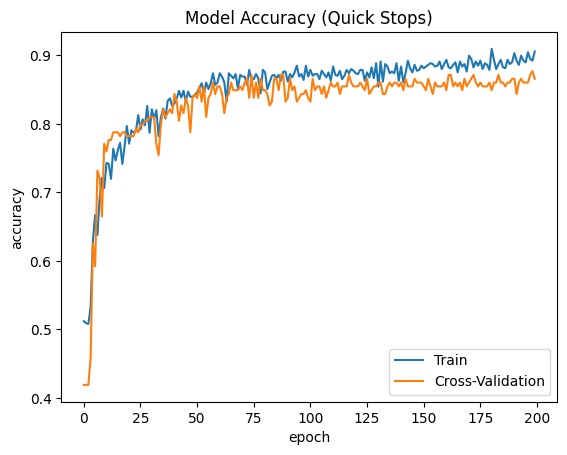

In [26]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Quick Stops)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()

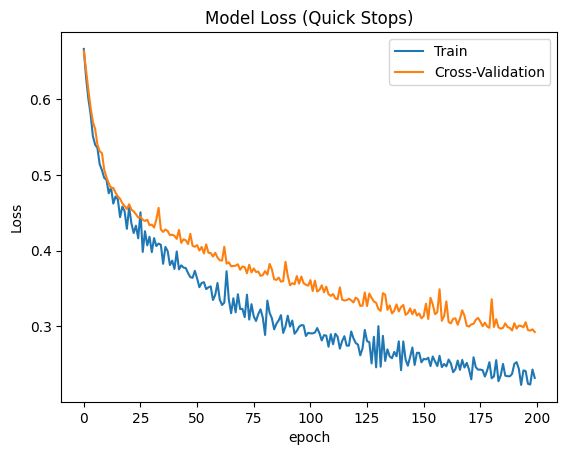

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (Quick Stops)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

In [28]:
print('Train Split: ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
27/27 [==============================] - 0s 1ms/step - loss: 0.2291 - accuracy: 0.9052
Accuracy   :  0.91 


In [29]:
print('Evaluation Split: ')
loss, accuracy =  model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
6/6 - 0s - loss: 0.2924 - accuracy: 0.8659 - 34ms/epoch - 6ms/step
Accuracy   :  0.87 


In [30]:
print('Test Split: ')
loss, accuracy =  model.evaluate(normed_test_data, test_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Test Split: 
6/6 - 0s - loss: 0.3138 - accuracy: 0.8708 - 24ms/epoch - 4ms/step
Accuracy   :  0.87 


6/6 [==============================] - 0s 1ms/step


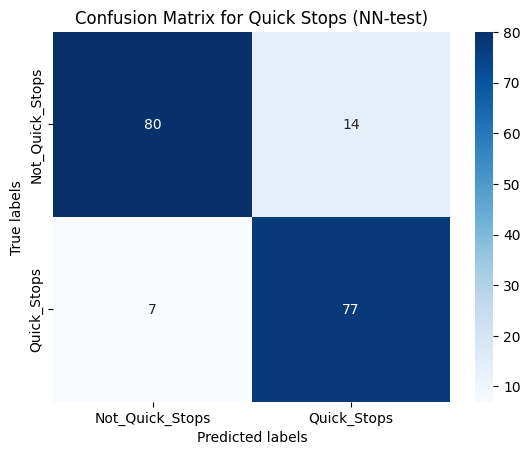

In [31]:
# Plot confusion matrix  
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(normed_test_data)

predict_results = (predict_results > 0.3)

cm = confusion_matrix(test_labels, predict_results)

sns.heatmap(cm, cmap = 'Blues', annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Quick Stops (NN-test)'); 
ax.xaxis.set_ticklabels(['Not_Quick_Stops', 'Quick_Stops']); ax.yaxis.set_ticklabels(['Not_Quick_Stops', 'Quick_Stops']);

In [32]:
NN_accuracy = metrics.accuracy_score(predict_results,test_labels)
print('Quick Stop accuracy (NN-test) = ', NN_accuracy)
print('Recall = ',metrics.recall_score(test_labels, predict_results))
print('Precision = ',metrics.precision_score(test_labels, predict_results))

Quick Stop accuracy (NN-test) =  0.8820224719101124
Recall =  0.9166666666666666
Precision =  0.8461538461538461


In [33]:
qspredict_results = model.predict(normed_train_data)
qspredict_results = (qspredict_results > 0.3)

qsNN_accuracy = metrics.accuracy_score(qspredict_results,train_labels)
print('Quick Stop accuracy (NN-training) = ', qsNN_accuracy)
print('Recall = ',metrics.recall_score(train_labels, qspredict_results))
print('Precision = ',metrics.precision_score(train_labels, qspredict_results))

27/27 [==============================] - 0s 767us/step
Quick Stop accuracy (NN-training) =  0.9111644657863145
Recall =  0.9164619164619164
Precision =  0.9031476997578692


In [34]:
qs2predict_results = model.predict(normed_valid_dataset)
qs2predict_results = (qs2predict_results > 0.3)

qs2NN_accuracy = metrics.accuracy_score(qs2predict_results,valid_labels)
print('Quick Stop accuracy (NN-validation) = ', qs2NN_accuracy)
print('Recall = ',metrics.recall_score(valid_labels, qs2predict_results))
print('Precision = ',metrics.precision_score(valid_labels, qs2predict_results))

6/6 [==============================] - 0s 997us/step
Quick Stop accuracy (NN-validation) =  0.8659217877094972
Recall =  0.8557692307692307
Precision =  0.9081632653061225


In [35]:
# save model and architecture to single file
model.save("modelqs.h5")

# Surface Taxi ##

In [36]:
#Combine files
dfsurface = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9]).reset_index()
len(dfsurface)

12367

In [37]:
#normalize values 
df_norm1 = dfsurface.loc[:, dfsurface.columns != 'datetime']
df_norm1 = (df_norm1-df_norm1.min())/(df_norm1.max()-df_norm1.min())
df_norm1.insert(1, 'datetime', dfsurface[['datetime']])

In [38]:
# Dataframe labeling for Surface Taxis
df_surface = df_norm1
df_surface['Surface_Taxi'] = 0

df_surface.loc[(df_surface['datetime'].between('2022-09-19 21:53:50' , '2022-09-19 21:55:55' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-19 22:04:00' , '2022-09-19 22:06:39' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-20 20:25:40' , '2022-09-20 20:27:54' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-22 21:16:37' , '2022-09-22 21:19:56' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-09-22 21:43:16' , '2022-09-22 21:43:41' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-10-06 13:52:16' , '2022-10-06 13:56:00' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-10-27 21:57:45' , '2022-10-27 21:59:45' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-10-27 22:00:30' , '2022-10-27 22:04:55' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-10-27 22:06:00' , '2022-10-27 22:07:59' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-10-27 22:09:03' , '2022-10-27 22:11:12' , inclusive='both')),['Surface_Taxi']] = 1
df_surface.loc[(df_surface['datetime'].between('2022-10-27 22:13:30' , '2022-10-27 22:17:58' , inclusive='both')),['Surface_Taxi']] = 1
df_surface

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,Surface_Taxi
0,0.000000,2022-09-19 20:01:09,0.603823,5.300899e-01,0.000004,0.955115,0.920591,0.000932,0.001393,0.437415,...,1.0,0.467375,0.821924,0.331066,0.004047,0.219376,0.072835,0.003199,0.003199,0
1,0.000406,2022-09-19 20:01:10,0.603823,5.300899e-01,0.000012,0.949742,0.915220,0.001054,0.001153,0.426498,...,1.0,0.362617,0.681450,0.373572,0.004047,0.219376,0.399971,0.013915,0.013915,0
2,0.000812,2022-09-19 20:01:11,0.603823,5.300899e-01,0.000014,0.948363,0.913843,0.000125,0.000132,0.428244,...,1.0,0.388360,0.674844,0.370517,0.004047,0.219357,0.877563,0.090793,0.090793,0
3,0.001219,2022-09-19 20:01:12,0.603823,5.300899e-01,0.000014,0.949263,0.914742,0.000035,0.000036,0.428370,...,1.0,0.448452,0.676112,0.366596,0.004047,0.219281,1.000000,0.244604,0.244604,0
4,0.001625,2022-09-19 20:01:13,0.603823,5.300899e-01,0.000014,0.949886,0.915364,0.000017,0.000018,0.428261,...,1.0,0.480326,0.676265,0.366036,0.004047,0.218942,1.000000,0.444592,0.444592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,0.573517,2022-10-27 22:18:45,0.014232,1.923442e-07,0.000053,0.713178,0.739347,0.000000,0.000000,0.405003,...,1.0,0.500000,0.173677,0.398252,0.000403,0.514487,0.442360,0.296399,0.296399,0
12363,0.573924,2022-10-27 22:18:46,0.014232,1.923442e-07,0.000053,0.713022,0.739191,0.000163,0.000162,0.405172,...,1.0,0.497688,0.172676,0.394954,0.000403,0.514487,0.214045,0.204947,0.204947,0
12364,0.574330,2022-10-27 22:18:47,0.014232,1.923442e-07,0.000050,0.712173,0.738341,0.000150,0.000153,0.406521,...,1.0,0.488152,0.171446,0.394845,0.000403,0.514485,0.000000,0.012422,0.012422,0
12365,0.574736,2022-10-27 22:18:48,0.014232,1.923442e-07,0.000048,0.712302,0.738470,0.000081,0.000086,0.408346,...,1.0,0.495167,0.170909,0.399923,0.000403,0.514468,0.000000,0.018237,0.018237,0


In [39]:
#call features used in model
model2_features = ['hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque',
                  'Surface_Taxi'
                 ]

Create a balanced dataset & train NN

In [40]:
df_surface_train = df_surface[df_surface['Surface_Taxi']==1]           # The original rows that have label 1
non_df_surface_train = df_surface[df_surface['Surface_Taxi']==0]       # The original rows that have label 0

In [41]:
print(len(df_surface_train))
print(len(non_df_surface_train))

1778
10589


In [42]:
sampled_non_df_surface = non_df_surface_train.sample(n = 1778)    # Sample 1778 data points from the surface taxi data

In [43]:
print(len(df_surface_train))
print(len(sampled_non_df_surface))

1778
1778


In [44]:
merged2 = pd.concat([df_surface_train, sampled_non_df_surface])     # After balancing, concatenating both classes into 1 dataframe

In [45]:
merged2 = merged2[model2_features]
merged2

,hasWeightOnWheels,absoluteAltitude,magneticHeading,groundSpeed,climbOrDescentRate,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,Surface_Taxi
2758,1.0,0.000075,0.721499,0.004623,0.547215,0.501441,0.554546,0.327412,0.394815,0.526113,0.427424,0.265772,0.265772,1
2759,1.0,0.000080,0.722747,0.010070,0.547037,0.547306,0.532277,0.361988,0.405238,0.526708,0.452363,0.305748,0.305748,1
2760,1.0,0.000079,0.723614,0.015751,0.546652,0.554128,0.540213,0.358735,0.405397,0.530042,0.448724,0.308924,0.308924,1
2761,1.0,0.000083,0.724869,0.018973,0.546558,0.559548,0.541215,0.354423,0.405397,0.532890,0.439043,0.293702,0.293702,1
2762,1.0,0.000083,0.726070,0.021710,0.546438,0.559833,0.541128,0.350675,0.405397,0.531255,0.435287,0.286518,0.286518,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,1.0,0.000017,0.058099,0.000150,0.546579,0.401667,0.643265,0.391253,0.000312,0.236707,0.481474,0.351419,0.351419,0
2921,1.0,0.000095,0.800051,0.003101,0.546682,0.437653,0.071720,0.358168,0.019056,0.345592,0.444291,0.298966,0.298966,0
5805,0.0,0.000564,0.195012,0.046933,0.488270,0.553547,0.649766,0.330980,0.522764,0.492519,0.532513,0.432499,0.432499,0
10254,0.0,0.001847,0.776666,0.050482,0.542978,0.470472,0.634816,0.336562,0.530689,0.444298,0.529286,0.425355,0.425355,0


In [46]:
# Split the data into 70% train and 30% test (later will divide the test set to test and validate.)
train2_dataset, temp2_test_dataset =  train_test_split(merged2, test_size=0.3)

print( train2_dataset.shape )
print( temp2_test_dataset.shape )

(2489, 14)
(1067, 14)


In [47]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 70% train, 15% validation, and 15% test]
test2_dataset, valid2_dataset =  train_test_split(temp2_test_dataset, test_size=0.5)
print( test2_dataset.shape )
print( valid2_dataset.shape )

(533, 14)
(534, 14)


In [48]:
print(f"Display the datatype of the test_dataset: {type(test2_dataset)}")
print(f" Train dataset       : {train2_dataset.shape}")
print(f" Test dataset       : {test2_dataset.shape}")
print(f" Validation dataset : {valid2_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Train dataset       : (2489, 14)
 Test dataset       : (533, 14)
 Validation dataset : (534, 14)


In [49]:
train2_labels = train2_dataset.pop('Surface_Taxi')
test2_labels = test2_dataset.pop('Surface_Taxi')
valid2_labels = valid2_dataset.pop('Surface_Taxi')

In [50]:

normed2_train_data = train2_dataset
normed2_test_data = test2_dataset
normed2_valid_dataset = valid2_dataset

In [51]:
print(r'Train/Test/Validate splits: ')
print(f'Train    : {normed2_train_data.shape} ')
print(f'Test     : {normed2_test_data.shape} ')
print(f'Validate : {normed2_valid_dataset.shape} ')

print(r'Train/Test/Validate labels: ')
print(f'Train Labels : {train2_labels.shape} ')
print(f'Test Labels  : {test2_labels.shape} ')
print(f'Test Labels  : {valid2_labels.shape} ')

Train/Test/Validate splits: 
Train    : (2489, 13) 
Test     : (533, 13) 
Validate : (534, 13) 
Train/Test/Validate labels: 
Train Labels : (2489,) 
Test Labels  : (533,) 
Test Labels  : (534,) 


In [52]:
# show a sample of the data after normalization
normed2_train_data.head(10)

,hasWeightOnWheels,absoluteAltitude,magneticHeading,groundSpeed,climbOrDescentRate,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque
12129,1.0,0.000639,0.699364,0.108049,0.546740,1.000000,0.405940,0.411557,0.331975,0.631500,0.399920,0.239941,0.239941
3107,1.0,0.000014,0.722876,0.000000,0.546523,0.499928,0.750432,0.426429,0.008417,0.442974,0.438367,0.290882,0.290882
11392,1.0,0.000496,0.081979,0.031770,0.550458,0.622804,0.441388,0.332587,0.399897,0.538066,0.450409,0.311297,0.311297
11837,1.0,0.000186,0.825309,0.028675,0.548780,0.086007,0.331830,0.321002,0.336501,0.523592,0.421104,0.265333,0.265333
7466,1.0,0.000153,0.855675,0.029591,0.546674,0.524663,0.563619,0.386861,0.408195,0.514127,0.438910,0.291290,0.291290
6192,0.0,0.028755,0.128411,0.020435,0.543575,0.462296,0.629797,0.364134,0.577205,0.379636,0.557523,0.476950,0.476950
9256,0.0,0.074616,0.233460,0.313647,0.588753,0.477167,0.573620,0.313478,0.470042,0.400951,0.497225,0.367261,0.367261
9368,0.0,0.051522,0.476052,0.059850,0.528580,0.453394,0.616294,0.333951,0.548072,0.407400,0.558002,0.470598,0.470598
5238,1.0,0.000098,0.065650,0.011604,0.547186,0.529338,0.588053,0.319207,0.466502,0.399257,0.501005,0.371236,0.371236
11597,1.0,0.000152,0.117787,0.032389,0.544948,0.504146,0.507652,0.367267,0.373189,0.540021,0.416713,0.262697,0.262697


Train NN model

In [53]:
%%time

# Defining the function for the model.
def build_model1_one_hidden_layer():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model2 = Sequential()

      
    # Input Layer with 16 Neurons
    model2.add(Dense(16, input_shape = (normed2_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
    model2.add(Dense(16, Activation('relu'))) # relu or sigmoid.
    #model.add(Dense(128,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated 
    
    
    
    
    model2.add(Dense(1))                          # Output layer => output dimension = 1 
    
   
    learning_rate = 0.0005
    optimizer = optimizers.Adam(learning_rate)
    model2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model2


EPOCHS = 100
batch_size = 16 

model2 = build_model1_one_hidden_layer()
print('Here is a summary of this model: ')
model2.summary()


with tf.device('/CPU:0'): 
#with tf.device('/GPU:0'): # train with a GPU, if available.
    history2 = model2.fit(
        normed2_train_data, 
        train2_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed2_train_data.shape[0] / batch_size) ,
        validation_data = (normed2_valid_dataset, valid2_labels),   
    )

Here is a summary of this model: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                224       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
155/155 [==============================] - 1s 2ms/step - loss: 0.6587 - accuracy: 0.5137 - val_loss: 0.5834 - val_accuracy: 0.4588
Epoch 2/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.6284 - val_loss: 0.4013 - val_accuracy: 0.9176


In [54]:
print('Summary of the results after each epoch: ')
hist2 = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch
hist2.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
95,0.085761,0.967246,0.078358,0.973783,95
96,0.077610,0.970886,0.078137,0.973783,96
97,0.084924,0.967651,0.078494,0.971910,97
98,0.073139,0.972503,0.079847,0.973783,98
99,0.085074,0.969268,0.079912,0.973783,99


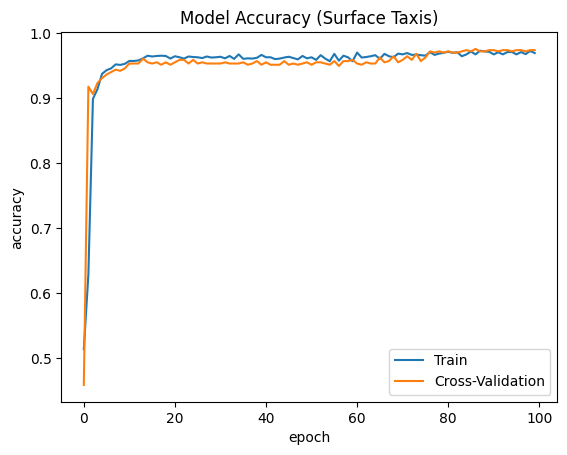

In [55]:
from matplotlib import pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy (Surface Taxis)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()

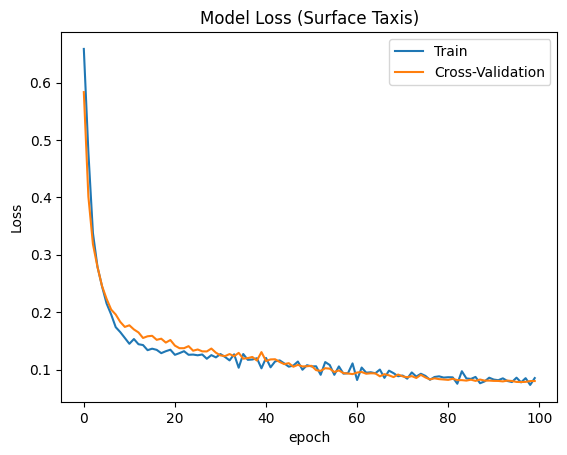

In [56]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss (Surface Taxis)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

In [57]:
print('Train Split: ')
loss, accuracy = model2.evaluate(normed2_train_data, train2_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
78/78 [==============================] - 0s 907us/step - loss: 0.0797 - accuracy: 0.9691
Accuracy   :  0.97 


In [58]:
print('Evaluation Split: ')
loss, accuracy =  model2.evaluate(normed2_valid_dataset, valid2_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
17/17 - 0s - loss: 0.0799 - accuracy: 0.9738 - 30ms/epoch - 2ms/step
Accuracy   :  0.97 


In [59]:
print('Test Split: ')
loss, accuracy =  model2.evaluate(normed2_test_data, test2_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Test Split: 
17/17 - 0s - loss: 0.0820 - accuracy: 0.9700 - 29ms/epoch - 2ms/step
Accuracy   :  0.97 


17/17 [==============================] - 0s 873us/step


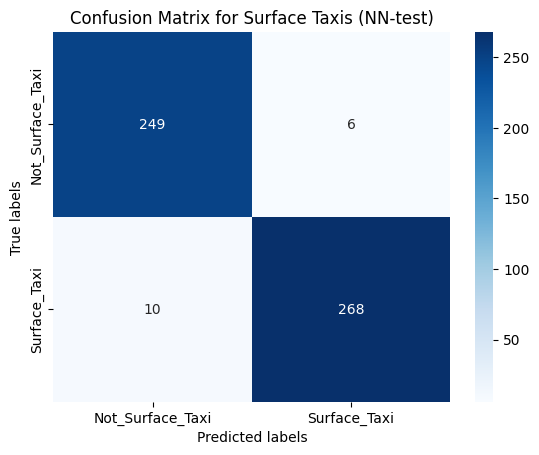

In [60]:
# Plot confusion matrix  
from sklearn.metrics import confusion_matrix


ax2= plt.subplot()
predict_results2 = model2.predict(normed2_test_data)

predict_results2 = (predict_results2 > 0.5)

cm2 = confusion_matrix(test2_labels, predict_results2)

sns.heatmap(cm2, cmap = 'Blues', annot=True, ax = ax2, fmt='g'); 
# labels, title and ticks
ax2.set_xlabel('Predicted labels');ax2.set_ylabel('True labels'); 
ax2.set_title('Confusion Matrix for Surface Taxis (NN-test)'); 
ax2.xaxis.set_ticklabels(['Not_Surface_Taxi', 'Surface_Taxi']); ax2.yaxis.set_ticklabels(['Not_Surface_Taxi', 'Surface_Taxi']);

In [61]:
NN_accuracy2 = metrics.accuracy_score(predict_results2,test2_labels)
print('Surface Taxis accuracy (NN-test) = ', NN_accuracy2)
print('Recall = ',metrics.recall_score(test2_labels, predict_results2))
print('Precision = ',metrics.precision_score(test2_labels, predict_results2))

Surface Taxis accuracy (NN-test) =  0.9699812382739212
Recall =  0.9640287769784173
Precision =  0.9781021897810219


In [62]:
stpredict_results2 = model2.predict(normed2_train_data)
stpredict_results2 = (stpredict_results2 > 0.5)

stNN_accuracy2 = metrics.accuracy_score(stpredict_results2,train2_labels)
print('Surface Taxis accuracy (NN-training) = ', stNN_accuracy2)
print('Recall = ',metrics.recall_score(train2_labels, stpredict_results2))
print('Precision = ',metrics.precision_score(train2_labels, stpredict_results2))

78/78 [==============================] - 0s 784us/step
Surface Taxis accuracy (NN-training) =  0.9690638810767377
Recall =  0.9595375722543352
Precision =  0.9764705882352941


In [63]:
st2predict_results2 = model2.predict(normed2_valid_dataset)
st2predict_results2 = (st2predict_results2 > 0.5)

st2NN_accuracy2 = metrics.accuracy_score(st2predict_results2,valid2_labels)
print('Surface Taxis accuracy (NN-validation) = ', st2NN_accuracy2)
print('Recall = ',metrics.recall_score(valid2_labels, st2predict_results2))
print('Precision = ',metrics.precision_score(valid2_labels, st2predict_results2))

17/17 [==============================] - 0s 866us/step
Surface Taxis accuracy (NN-validation) =  0.9737827715355806
Recall =  0.972318339100346
Precision =  0.9790940766550522


In [64]:
# save model and architecture to single file
model2.save("modelst.h5")

# HOVER TAXIS ##

In [65]:
#Combine files
dfhover = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9]).reset_index()
len(dfhover)

12367

In [66]:
#normalize values 
df_norm2 = dfhover.loc[:, dfhover.columns != 'datetime']
df_norm2 = (df_norm2-df_norm2.min())/(df_norm2.max()-df_norm2.min())
df_norm2.insert(1, 'datetime', dfhover[['datetime']])


In [67]:
# Dataframe labeling for Hover Taxis
df_h = df_norm2
df_h['hover'] = 0

df_h.loc[(df_h['datetime'].between('2022-09-19 21:57:07' , '2022-09-19 21:59:20' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-19 22:08:15' , '2022-09-19 22:10:24' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:32:39' , '2022-09-20 20:34:06' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:20:41' , '2022-09-22 21:23:56' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:28:35' , '2022-09-22 21:29:46' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:44:09' , '2022-09-22 21:45:31' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-10-06 13:56:43' , '2022-10-06 14:00:40' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-10-20 21:42:00' , '2022-10-20 21:46:30' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-10-20 21:50:00' , '2022-10-20 21:52:05' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-10-20 21:54:00' , '2022-10-20 21:56:45' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-10-20 21:58:00' , '2022-10-20 22:00:08' , inclusive='both')),['hover']] = 1

df_h

,index,datetime,latitude,longitude,absoluteAltitude,magneticHeading,trueHeading,groundSpeed,trueAirspeed,pitch,...,hasWeightOnWheels,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,hover
0,0.000000,2022-09-19 20:01:09,0.603823,5.300899e-01,0.000004,0.955115,0.920591,0.000932,0.001393,0.437415,...,1.0,0.467375,0.821924,0.331066,0.004047,0.219376,0.072835,0.003199,0.003199,0
1,0.000406,2022-09-19 20:01:10,0.603823,5.300899e-01,0.000012,0.949742,0.915220,0.001054,0.001153,0.426498,...,1.0,0.362617,0.681450,0.373572,0.004047,0.219376,0.399971,0.013915,0.013915,0
2,0.000812,2022-09-19 20:01:11,0.603823,5.300899e-01,0.000014,0.948363,0.913843,0.000125,0.000132,0.428244,...,1.0,0.388360,0.674844,0.370517,0.004047,0.219357,0.877563,0.090793,0.090793,0
3,0.001219,2022-09-19 20:01:12,0.603823,5.300899e-01,0.000014,0.949263,0.914742,0.000035,0.000036,0.428370,...,1.0,0.448452,0.676112,0.366596,0.004047,0.219281,1.000000,0.244604,0.244604,0
4,0.001625,2022-09-19 20:01:13,0.603823,5.300899e-01,0.000014,0.949886,0.915364,0.000017,0.000018,0.428261,...,1.0,0.480326,0.676265,0.366036,0.004047,0.218942,1.000000,0.444592,0.444592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12362,0.573517,2022-10-27 22:18:45,0.014232,1.923442e-07,0.000053,0.713178,0.739347,0.000000,0.000000,0.405003,...,1.0,0.500000,0.173677,0.398252,0.000403,0.514487,0.442360,0.296399,0.296399,0
12363,0.573924,2022-10-27 22:18:46,0.014232,1.923442e-07,0.000053,0.713022,0.739191,0.000163,0.000162,0.405172,...,1.0,0.497688,0.172676,0.394954,0.000403,0.514487,0.214045,0.204947,0.204947,0
12364,0.574330,2022-10-27 22:18:47,0.014232,1.923442e-07,0.000050,0.712173,0.738341,0.000150,0.000153,0.406521,...,1.0,0.488152,0.171446,0.394845,0.000403,0.514485,0.000000,0.012422,0.012422,0
12365,0.574736,2022-10-27 22:18:48,0.014232,1.923442e-07,0.000048,0.712302,0.738470,0.000081,0.000086,0.408346,...,1.0,0.495167,0.170909,0.399923,0.000403,0.514468,0.000000,0.018237,0.018237,0


In [68]:
#call features used in model
model3_features = ['hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque',
                  'hover'
                 ]

Create a balanced dataset & train NN

In [69]:
df_h_train = df_h[df_h['hover']==1]           # The original rows that have label 1
non_df_h_train = df_h[df_h['hover']==0]       # The original rows that have label 0

In [70]:
print(len(df_h_train))
print(len(non_df_h_train))

1944
10423


In [71]:
sampled_non_df_h = non_df_h_train.sample(n = 1944)    # Sample 1944 data points from the surface taxi data

In [72]:
print(len(df_h_train))
print(len(sampled_non_df_h))

1944
1944


In [73]:
merged3 = pd.concat([df_h_train, sampled_non_df_h])     # After balancing, concatenating both classes into 1 dataframe

In [74]:
merged3 = merged3[model3_features]
merged3

,hasWeightOnWheels,absoluteAltitude,magneticHeading,groundSpeed,climbOrDescentRate,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,hover
2955,0.0,0.001074,0.707232,0.037991,0.535856,0.426301,0.647028,0.350176,0.525807,0.411964,0.522649,0.417270,0.417270,1
2956,0.0,0.001071,0.706727,0.039386,0.542735,0.446156,0.638977,0.354125,0.527228,0.434687,0.525507,0.423082,0.423082,1
2957,0.0,0.001167,0.708063,0.041010,0.548377,0.510974,0.639586,0.359472,0.527555,0.439648,0.524512,0.422523,0.422523,1
2958,0.0,0.001286,0.709390,0.043171,0.550959,0.556951,0.636823,0.375970,0.527612,0.445098,0.523032,0.419814,0.419814,1
2959,0.0,0.001399,0.712110,0.046113,0.551423,0.672467,0.635268,0.378210,0.527487,0.451222,0.521737,0.417330,0.417330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1.0,0.000014,0.947850,0.000000,0.546522,0.499833,0.695830,0.337019,0.000082,0.140424,0.522601,0.416998,0.416998,0
650,0.0,0.679047,0.994225,0.774301,0.518167,0.515983,0.492799,0.380841,0.510550,0.482114,0.601197,0.529615,0.529615,0
9298,0.0,0.074319,0.196889,0.033450,0.578713,0.356895,0.650633,0.399274,0.565055,0.375675,0.546076,0.454823,0.454823,0
88,1.0,0.000011,0.949091,0.000022,0.546513,0.489888,0.675790,0.368504,0.002632,0.207970,0.844269,0.454329,0.454329,0


In [75]:
# Split the data into 70% train and 30% test (later will divide the test set to test and validate.)
train3_dataset, temp3_test_dataset =  train_test_split(merged3, test_size=0.3)

print( train3_dataset.shape )
print( temp3_test_dataset.shape )

(2721, 14)
(1167, 14)


In [76]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 70% train, 15% validation, and 15% test]
test3_dataset, valid3_dataset =  train_test_split(temp3_test_dataset, test_size=0.5)
print( test3_dataset.shape )
print( valid3_dataset.shape )

(583, 14)
(584, 14)


In [77]:
train3_labels = train3_dataset.pop('hover')
test3_labels = test3_dataset.pop('hover')
valid3_labels = valid3_dataset.pop('hover')

In [78]:
normed3_train_data = train3_dataset
normed3_test_data = test3_dataset
normed3_valid_dataset = valid3_dataset

In [79]:
print(r'Train/Test/Validate splits: ')
print(f'Train    : {normed3_train_data.shape} ')
print(f'Test     : {normed3_test_data.shape} ')
print(f'Validate : {normed3_valid_dataset.shape} ')

print(r'Train/Test/Validate labels: ')
print(f'Train Labels : {train3_labels.shape} ')
print(f'Test Labels  : {test3_labels.shape} ')
print(f'Test Labels  : {valid3_labels.shape} ')

Train/Test/Validate splits: 
Train    : (2721, 13) 
Test     : (583, 13) 
Validate : (584, 13) 
Train/Test/Validate labels: 
Train Labels : (2721,) 
Test Labels  : (583,) 
Test Labels  : (584,) 


In [80]:
# show a sample of the data after normalization
normed3_train_data.head(10)

,hasWeightOnWheels,absoluteAltitude,magneticHeading,groundSpeed,climbOrDescentRate,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque
11992,1.0,0.000064,0.637732,0.000000,0.546523,0.500000,0.127416,0.364649,0.003725,0.515672,0.440480,0.293699,0.293699
10285,0.0,0.006093,0.972470,0.103890,0.555301,0.677171,0.616648,0.287514,0.517308,0.456786,0.522663,0.418220,0.418220
4838,1.0,0.000011,0.594730,0.000049,0.546018,0.493589,0.624382,0.399977,0.003847,0.573141,0.439071,0.281555,0.281555
9265,0.0,0.072273,0.231828,0.439540,0.528308,0.429867,0.588949,0.347936,0.467482,0.422052,0.515452,0.403967,0.403967
2070,0.0,0.663997,0.507859,0.851702,0.523110,0.510344,0.462980,0.375885,0.547750,0.473162,0.640754,0.604111,0.604111
3418,0.0,0.000164,0.987092,0.069534,0.546165,0.480447,0.693284,0.381187,0.420094,0.433120,0.454703,0.314332,0.314332
10317,0.0,0.005623,0.978188,0.066434,0.551778,0.572816,0.627160,0.355883,0.540189,0.463463,0.532212,0.434308,0.434308
4287,1.0,0.000633,0.954569,0.042919,0.547378,0.244821,0.251064,0.319581,0.319064,0.640873,0.422156,0.269278,0.269278
4598,0.0,0.034705,0.085996,0.250436,0.558444,0.511698,0.592545,0.291108,0.464206,0.386275,0.501800,0.381811,0.381811
5506,0.0,0.002748,0.791119,0.110568,0.521152,0.556466,0.619534,0.301807,0.517020,0.444542,0.521834,0.416324,0.416324


Train NN model

In [81]:
%%time

# Defining the function for the model.
def build_model1_one_hidden_layer():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model3 = Sequential()

        
    # Input Layer with 16 Neurons
    model3.add(Dense(16, input_shape = (normed3_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
    model3.add(Dense(16, Activation('relu'))) # relu or sigmoid.
    #model.add(Dense(128,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated 
    
    
    
    
    model3.add(Dense(1))                          # Output layer => output dimension = 1 
    
   
    learning_rate = 0.0005
    optimizer = optimizers.Adam(learning_rate)
    model3.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model3


EPOCHS = 125
batch_size = 16 

model3 = build_model1_one_hidden_layer()
print('Here is a summary of this model: ')
model3.summary()


with tf.device('/CPU:0'): 
#with tf.device('/GPU:0'): # train with a GPU, if available.
    history3 = model3.fit(
        normed3_train_data, 
        train3_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed3_train_data.shape[0] / batch_size) ,
        validation_data = (normed3_valid_dataset, valid3_labels),   
    )

Here is a summary of this model: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                224       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/125
170/170 [==============================] - 1s 2ms/step - loss: 0.6084 - accuracy: 0.5026 - val_loss: 0.5364 - val_accuracy: 0.4743
Epoch 2/125
170/170 [==============================] - 0s 1ms/step - loss: 0.4914 - accuracy: 0.6828 - val_loss: 0.4344 - val_accuracy: 0.8408


In [82]:
print('Summary of the results after each epoch: ')
hist3 = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch
hist3.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
120,0.255576,0.890573,0.255457,0.890411,120
121,0.257347,0.893161,0.244285,0.898973,121
122,0.252620,0.896118,0.241235,0.900685,122
123,0.239955,0.902033,0.256692,0.888699,123
124,0.259799,0.890203,0.240938,0.902397,124


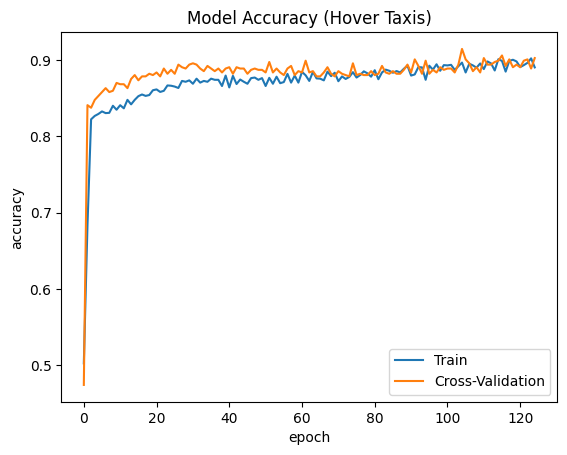

In [83]:
from matplotlib import pyplot as plt
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy (Hover Taxis)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()

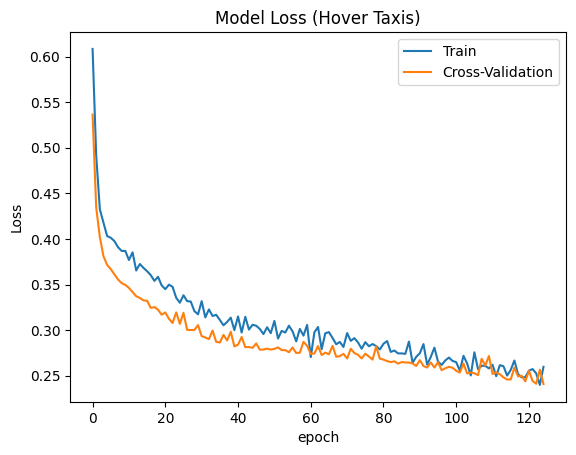

In [84]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss (Hover Taxis)')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

In [85]:
print('Train Split: ')
loss3, accuracy3 = model3.evaluate(normed3_train_data, train3_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy3))

Train Split: 
86/86 [==============================] - 0s 898us/step - loss: 0.2491 - accuracy: 0.8975
Accuracy   :  0.90 


In [86]:
print('Evaluation Split: ')
loss3, accuracy3 =  model3.evaluate(normed3_valid_dataset, valid3_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy3))

Evaluation Split: 
19/19 - 0s - loss: 0.2409 - accuracy: 0.9024 - 30ms/epoch - 2ms/step
Accuracy   :  0.90 


In [87]:
print('Test Split: ')
loss3, accuracy3 =  model3.evaluate(normed3_test_data, test3_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy3))

Test Split: 
19/19 - 0s - loss: 0.2124 - accuracy: 0.9039 - 31ms/epoch - 2ms/step
Accuracy   :  0.90 


19/19 [==============================] - 0s 880us/step


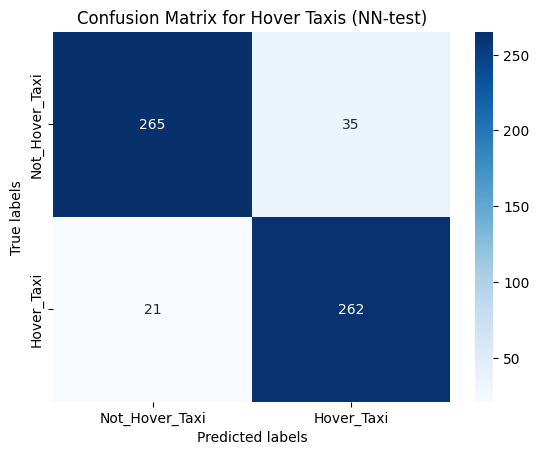

In [88]:
# plot confusion matrix    
from sklearn.metrics import confusion_matrix


ax3= plt.subplot()
predict_results3 = model3.predict(normed3_test_data)

predict_results3 = (predict_results3 > 0.5)

cm3 = confusion_matrix(test3_labels, predict_results3)

sns.heatmap(cm3, cmap = 'Blues', annot=True, ax = ax3, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax3.set_xlabel('Predicted labels');ax3.set_ylabel('True labels'); 
ax3.set_title('Confusion Matrix for Hover Taxis (NN-test)'); 
ax3.xaxis.set_ticklabels(['Not_Hover_Taxi', 'Hover_Taxi']); ax3.yaxis.set_ticklabels(['Not_Hover_Taxi', 'Hover_Taxi']);

In [89]:
NN_accuracy3 = metrics.accuracy_score(predict_results3,test3_labels)
print('Hover Taxis accuracy (NN-test) = ', NN_accuracy3)
print('Recall = ',metrics.recall_score(test3_labels, predict_results3))
print('Precision = ',metrics.precision_score(test3_labels, predict_results3))

Hover Taxis accuracy (NN-test) =  0.9039451114922813
Recall =  0.9257950530035336
Precision =  0.8821548821548821


In [90]:
htpredict_results3 = model3.predict(normed3_train_data)
htpredict_results3 = (htpredict_results3 > 0.5)

htNN_accuracy3 = metrics.accuracy_score(htpredict_results3,train3_labels)
print('Hover Taxis accuracy (NN-train) = ', htNN_accuracy3)
print('Recall = ',metrics.recall_score(train3_labels, htpredict_results3))
print('Precision = ',metrics.precision_score(train3_labels, htpredict_results3))

86/86 [==============================] - 0s 781us/step
Hover Taxis accuracy (NN-train) =  0.8974641675854466
Recall =  0.9246676514032496
Precision =  0.8761371588523443


In [91]:
ht2predict_results3 = model3.predict(normed3_valid_dataset)
ht2predict_results3 = (ht2predict_results3 > 0.5)

ht2NN_accuracy3 = metrics.accuracy_score(ht2predict_results3,valid3_labels)
print('Hover Taxis accuracy (NN-validation) = ', ht2NN_accuracy3)
print('Recall = ',metrics.recall_score(valid3_labels, ht2predict_results3))
print('Precision = ',metrics.precision_score(valid3_labels, ht2predict_results3))

19/19 [==============================] - 0s 826us/step
Hover Taxis accuracy (NN-validation) =  0.9023972602739726
Recall =  0.9218241042345277
Precision =  0.8955696202531646


In [92]:
# save model and architecture to single file
model3.save("modelht.h5")